In [1]:
# 112機器學習期末報告_part1_資料前處理
# 2023/12/15
# 7111029062 陳思蓓

- 資料前處理讀取檔案 BankChurners.csv
- 處理後匯出檔案 processed_data.csv

In [2]:
import pandas as pd
data = pd.read_csv('BankChurners.csv', delimiter=",", header='infer')

### 1. 刪除ID欄位

In [3]:
# 刪除 CLIENTNUM 特徵
data.drop('CLIENTNUM', axis=1, inplace=True)

### 2. 確認資料集中沒有missing value


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

### 3. 資料正規劃，做 Label Encoder

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
# 讀取數據
data = pd.read_csv('BankChurners.csv')

# 定義需要簡化的特徵
features_to_simplify = ['Education_Level', 'Marital_Status', 'Card_Category', 'Gender']

# 對具特徵進行簡化
for feature in features_to_simplify:
    label_encoder = LabelEncoder()
    data[feature] = label_encoder.fit_transform(data[feature])

# 將 Attrition_Flag 改為 0 和 1
attrition_mapping = {'Existing Customer': 0, 'Attrited Customer': 1}
data['Attrition_Flag'] = data['Attrition_Flag'].map(attrition_mapping)

# Income_Category 另外處理（有順序性）
income_mapping = {
    'Less than $40K': 0,
    '$40K - $60K': 1,
    '$60K - $80K': 2,
    '$80K - $120K': 3,
    '$120K +': 4,
    'Unknown': 5  # 或者你可以將 Unknown 視為一個單獨的分類
}
data['Income_Category'] = data['Income_Category'].map(income_mapping)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Marital_Status            10127 non-null  int64  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### 4. 檢查離群值
- 從Kaggle中觀察 Total_Amt_Chng_Q4_Q1 與 Total_Amt_Chng_Q4_Q1 資料分布偏左
- 對上述欄位取log

In [7]:
import matplotlib.pyplot as plt
import numpy as np

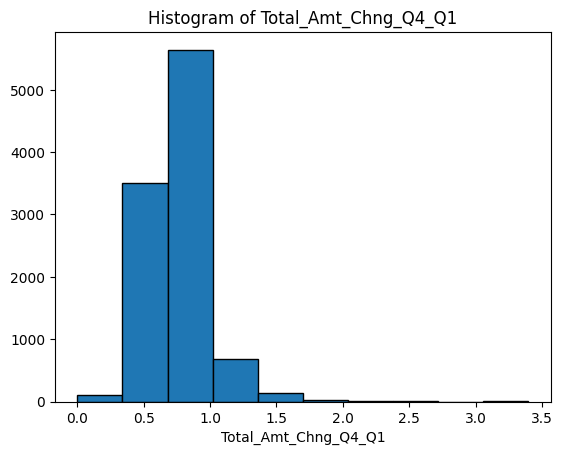

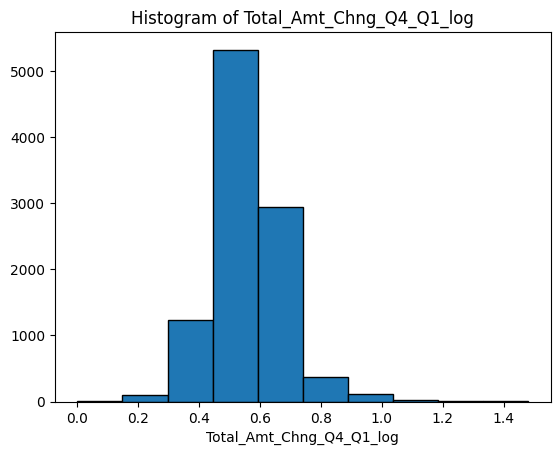

In [8]:
# Total_Amt_Chng_Q4_Q1 資料
data_log = data['Total_Amt_Chng_Q4_Q1']

# 繪製直方圖
plt.hist(data_log, bins=10, edgecolor='black')
plt.xlabel('Total_Amt_Chng_Q4_Q1')
plt.title('Histogram of Total_Amt_Chng_Q4_Q1')
plt.show()

# Total_Amt_Chng_Q4_Q1_log 資料
data_log = np.log1p(data['Total_Amt_Chng_Q4_Q1'])

# 繪製直方圖
plt.hist(data_log, bins=10, edgecolor='black')
plt.xlabel('Total_Amt_Chng_Q4_Q1_log')
plt.title('Histogram of Total_Amt_Chng_Q4_Q1_log')
plt.show()

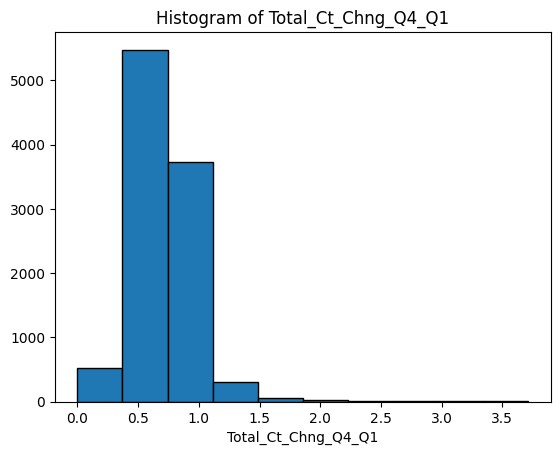

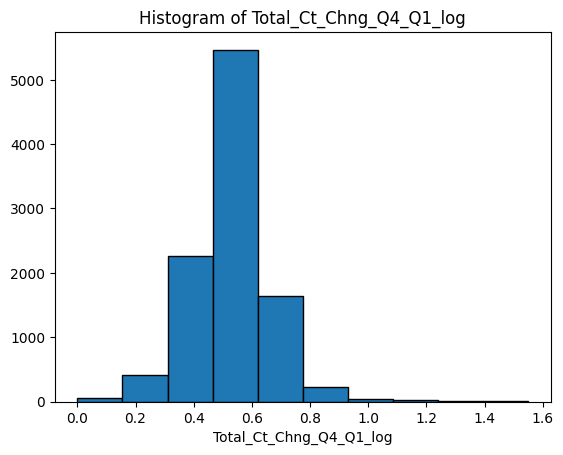

In [9]:
# Total_Ct_Chng_Q4_Q1 資料
data_ct = data['Total_Ct_Chng_Q4_Q1']

# 繪製直方圖
plt.hist(data_ct, bins=10, edgecolor='black')
plt.xlabel('Total_Ct_Chng_Q4_Q1')
plt.title('Histogram of Total_Ct_Chng_Q4_Q1')
plt.show()

# Total_Ct_Chng_Q4_Q1_log 資料
data_ct_log = np.log1p(data['Total_Ct_Chng_Q4_Q1'])

# 繪製直方圖
plt.hist(data_ct_log, bins=10, edgecolor='black')
plt.xlabel('Total_Ct_Chng_Q4_Q1_log')
plt.title('Histogram of Total_Ct_Chng_Q4_Q1_log')
plt.show()

### 5. 資料標準化，使用Min-Max

In [10]:
from sklearn.preprocessing import MinMaxScaler

# 要標準化的特徵
features_to_normalize = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                          'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                          'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                          'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# 創建一個MinMaxScaler
scaler = MinMaxScaler()

# 對指定的特徵進行最小-最大標準化
data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

### 匯出檔案 processed_data.csv

In [11]:
# 存儲編碼後的數據為新檔案
data.to_csv('processed_data.csv', index=False)


#### 檢查一下測試與訓練資料 ＾＾b

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 假設你的特徵和標籤是這樣的
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']

# 分割資料集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 計算訓練集中標籤的分佈
train_label_distribution = y_train.value_counts(normalize=True)
print("Training Set Label Distribution:")
print(train_label_distribution)

# 計算測試集中標籤的分佈
test_label_distribution = y_test.value_counts(normalize=True)
print("\nTesting Set Label Distribution:")
print(test_label_distribution)

Training Set Label Distribution:
0    0.839526
1    0.160474
Name: Attrition_Flag, dtype: float64

Testing Set Label Distribution:
0    0.838598
1    0.161402
Name: Attrition_Flag, dtype: float64


## 接下來
- 112機器學習期末報告_part2_Logistic Regression.ipynb
- part 2 : https://colab.research.google.com/drive/1WdrRpgr_f0QCgkFmgY91kSz2LUjYPNzc


## 其他part

- part 2 - Logistic Regression : https://colab.research.google.com/drive/1WdrRpgr_f0QCgkFmgY91kSz2LUjYPNzc
- part 3 - Bernoulli Naive Bayes : https://colab.research.google.com/drive/10qsCAieQL3K3DCCCUike05G2tj0qMeH_#scrollTo=62wX6d9tx9Dm
- part 4 - Gaussian Naive Bayes: https://colab.research.google.com/drive/1RneJrq6lHWHpoQalw5PqfRJQRATleMKP#scrollTo=GKZ-6UFJzMk2
- part 5 - SVM : https://colab.research.google.com/drive/13lZfMt8wvlpBsFScI-UfyCG0kJ_UwUiu#scrollTo=y-AZi4GU4ENY
- part 6 - Voting classifier : https://colab.research.google.com/drive/18Lc74nzb74ZVEgIJ2-n-1y4eM4gV2ASl#scrollTo=4ARuZiQ32ypO
- part 7 - Bagging classifier : https://colab.research.google.com/drive/1BjH0kDM4h7eAEQzYgJx5I9tf43uJNHAg#scrollTo=JeOMwpIY37XC
- other : https://colab.research.google.com/drive/1n_3NtKsvYMpZR_verOCk8kHRaIEzch7g?hl=zh-tw#scrollTo=yDtmaLf_3rP7